In [1]:
import pandas as pd
dataset = pd.read_csv("../data/hr_data_preprocessed.csv")

In [2]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['left'], axis=1).values

y = dataset['left'].values

In [3]:
# Split it to a 70:30 Ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Train Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
predictions = model.predict(X_test)


print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.51%
[[3192  260]
 [ 707  341]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3452
           1       0.57      0.33      0.41      1048

    accuracy                           0.79      4500
   macro avg       0.69      0.63      0.64      4500
weighted avg       0.76      0.79      0.76      4500



## Test Model on a single new row of data

In [7]:
input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

In [8]:
# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

C:\ProgramData\Anaconda3\envs\carlaspace\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.89333316, 0.10666684]])

## Train RandomForest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy 98.98%
[[3440   12]
 [  34 1014]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3452
           1       0.99      0.97      0.98      1048

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [10]:
dataset.drop(['left'], axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [11]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.313812
0,0.180742
2,0.178029
1,0.156364
6,0.124848
16,0.009477
3,0.009269
15,0.004379
17,0.003958
13,0.003921


## Train with Neural Network

In [12]:
%tensorflow_version 2.x 

UsageError: Line magic function `%tensorflow_version` not found.


In [13]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4148 - accuracy: 0.7941 - val_loss: 0.3025 - val_accuracy: 0.8400
Epoch 2/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2818 - accuracy: 0.8619 - val_loss: 0.2498 - val_accuracy: 0.9044
Epoch 3/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2448 - accuracy: 0.9248 - val_loss: 0.2217 - val_accuracy: 0.9309
Epoch 4/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2226 - accuracy: 0.9406 - val_loss: 0.2031 - val_accuracy: 0.9436
Epoch 5/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2070 - accuracy: 0.9468 - val_loss: 0.1908 - val_accuracy: 0.9493
Epoch 6/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1957 - accuracy: 0.9493 - val_loss: 0.1801 - val_accuracy: 0.9511
Epoch 7/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1874 - accuracy: 0.9503 - val_loss: 0.1748 - val_accuracy:

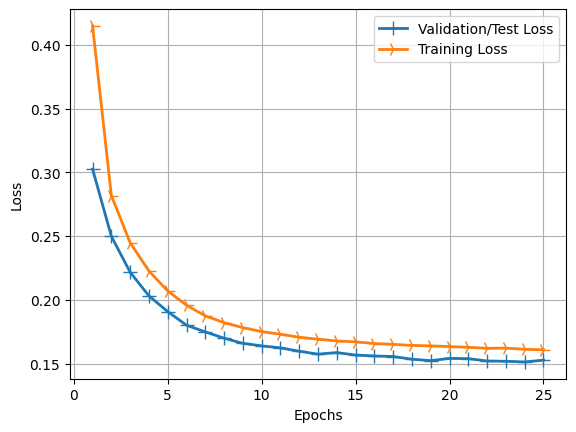

In [16]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

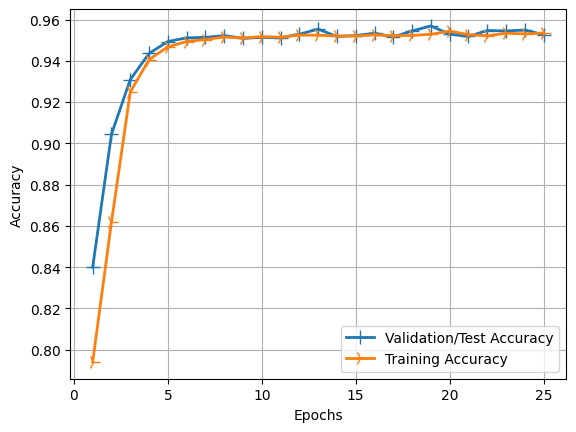

In [17]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3327  125]
 [  88  960]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3452
           1       0.88      0.92      0.90      1048

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



## Train Deep Neural Network

In [19]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [21]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.6304 - accuracy: 0.9047 - val_loss: 0.2766 - val_accuracy: 0.9444
Epoch 2/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2824 - accuracy: 0.9402 - val_loss: 0.2407 - val_accuracy: 0.9471
Epoch 3/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2631 - accuracy: 0.9411 - val_loss: 0.2289 - val_accuracy: 0.9527
Epoch 4/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2562 - accuracy: 0.9423 - val_loss: 0.2333 - val_accuracy: 0.9487
Epoch 5/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2524 - accuracy: 0.9429 - val_loss: 0.2208 - val_accuracy: 0.9542
Epoch 6/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2465 - accuracy: 0.9447 - val_loss: 0.2185 - val_accuracy: 0.9558
Epoch 7/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2444 - accuracy: 0.9445 - val_loss: 0.2210 - val_accuracy:

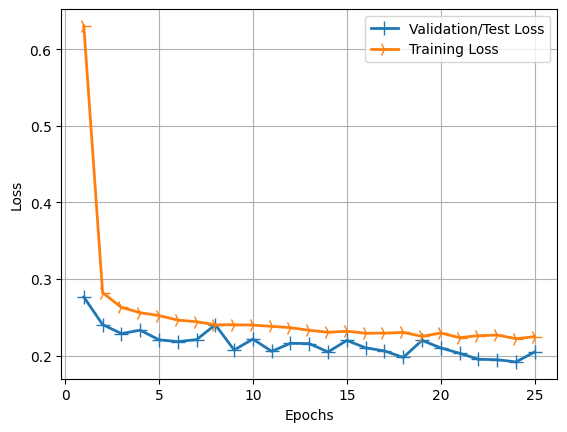

In [24]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

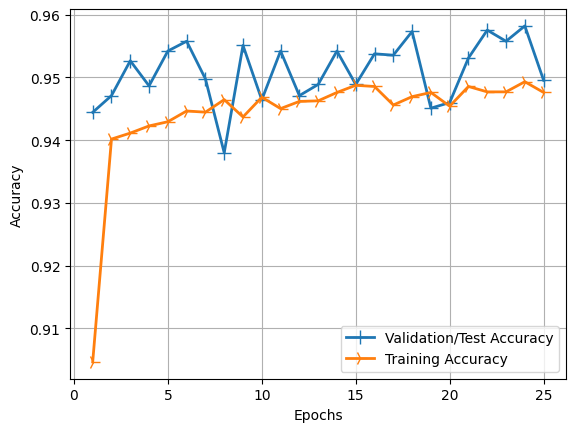

In [25]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3310  142]
 [  85  963]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3452
           1       0.87      0.92      0.89      1048

    accuracy                           0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500

